---------------------------------------------------

# -----------------PROYECTO ML FIN DE BOOTCAMP---------------------
## -----------------------------------------EDA------------------------------------------

---------------------------------------------------

---------------------------------------------------

In [88]:
import warnings
import sys
sys.path.append('../')
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from scipy import stats

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [90]:
from utils.funciones import data_report
from utils.funciones import verificador_unidades
from utils.funciones import apply_onehot_encoder
from utils.funciones import graficar_histograma_y_evaluar_normalidad_visual

ImportError: cannot import name 'graficar_histograma_y_evaluar_normalidad_visual' from 'utils.funciones' (c:\Users\Sandia\Desktop\Proyecto ML\Proyecto-ML-TheBridge\src\notebooks\..\utils\funciones.py)

In [60]:
df = pd.read_csv('../data/processed/DatosLimpios.csv', index_col= False)

In [61]:
df.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price_euro,Edad,Name_General
0,Pune,41000,Diesel,Manual,3,19.67,1582.0,126.20,5.0,13895.06,9,Hyundai
1,Chennai,46000,Petrol,Manual,3,9.75,1199.0,88.70,5.0,5002.22,13,Honda
2,Chennai,87000,Diesel,Manual,3,20.77,1248.0,88.76,7.0,6669.63,12,Maruti
3,Coimbatore,40670,Diesel,Automatic,2,15.20,1968.0,140.80,5.0,19719.88,11,Audi
4,Jaipur,86999,Diesel,Manual,3,23.08,1461.0,63.10,5.0,3890.62,11,Nissan


## 1. Realizamos una exploracion general de las variables, discriminando variables numericas y categoricas.

In [62]:
print("Resumen estadístico de variables numéricas:")

df.describe()

Resumen estadístico de variables numéricas:


,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price_euro,Edad
count,5.807000e+03,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000
mean,5.834902e+04,2.804374,18.202893,1631.839332,113.827636,5.286551,10753.033115,10.524195
std,9.265556e+04,0.446552,4.291753,601.822651,53.903495,0.806790,12552.259096,3.170718
min,1.710000e+02,0.000000,0.000000,624.000000,34.200000,2.000000,489.110000,5.000000
25%,3.328800e+04,3.000000,15.260000,1198.000000,78.000000,5.000000,3990.660000,8.000000
50%,5.240000e+04,3.000000,18.200000,1497.000000,98.600000,5.000000,6391.730000,10.000000
75%,7.245750e+04,3.000000,21.100000,1991.000000,139.040000,5.000000,11393.950000,12.000000
max,6.500000e+06,3.000000,28.400000,5998.000000,560.000000,10.000000,177856.830000,26.000000


In [63]:
print("\nExploración de variables categóricas: \n")
for column in df.select_dtypes(include=['object']):
    print(f"Columna: {column}\n")
    print(df[column].value_counts())
    print("---------------------------------------------------\n")


Exploración de variables categóricas: 

Columna: Location

Location
Mumbai        757
Hyderabad     709
Kochi         637
Coimbatore    629
Pune          581
Delhi         535
Kolkata       521
Chennai       474
Jaipur        400
Bangalore     347
Ahmedabad     217
Name: count, dtype: int64
---------------------------------------------------

Columna: Fuel_Type

Fuel_Type
Diesel    3152
Petrol    2655
Name: count, dtype: int64
---------------------------------------------------

Columna: Transmission

Transmission
Manual       4105
Automatic    1702
Name: count, dtype: int64
---------------------------------------------------

Columna: Name_General

Name_General
Maruti           1121
Hyundai          1050
Honda             600
Toyota            393
Mercedes-Benz     316
Volkswagen        314
Ford              294
Mahindra          268
BMW               262
Audi              235
Tata              181
Skoda             172
Renault           145
Chevrolet         120
Nissan             8

## 2. Haremos una visualización gráfica de las variables

Visualizaremos la distribucion de los datos por medio de histogramas y graficos de densidad.

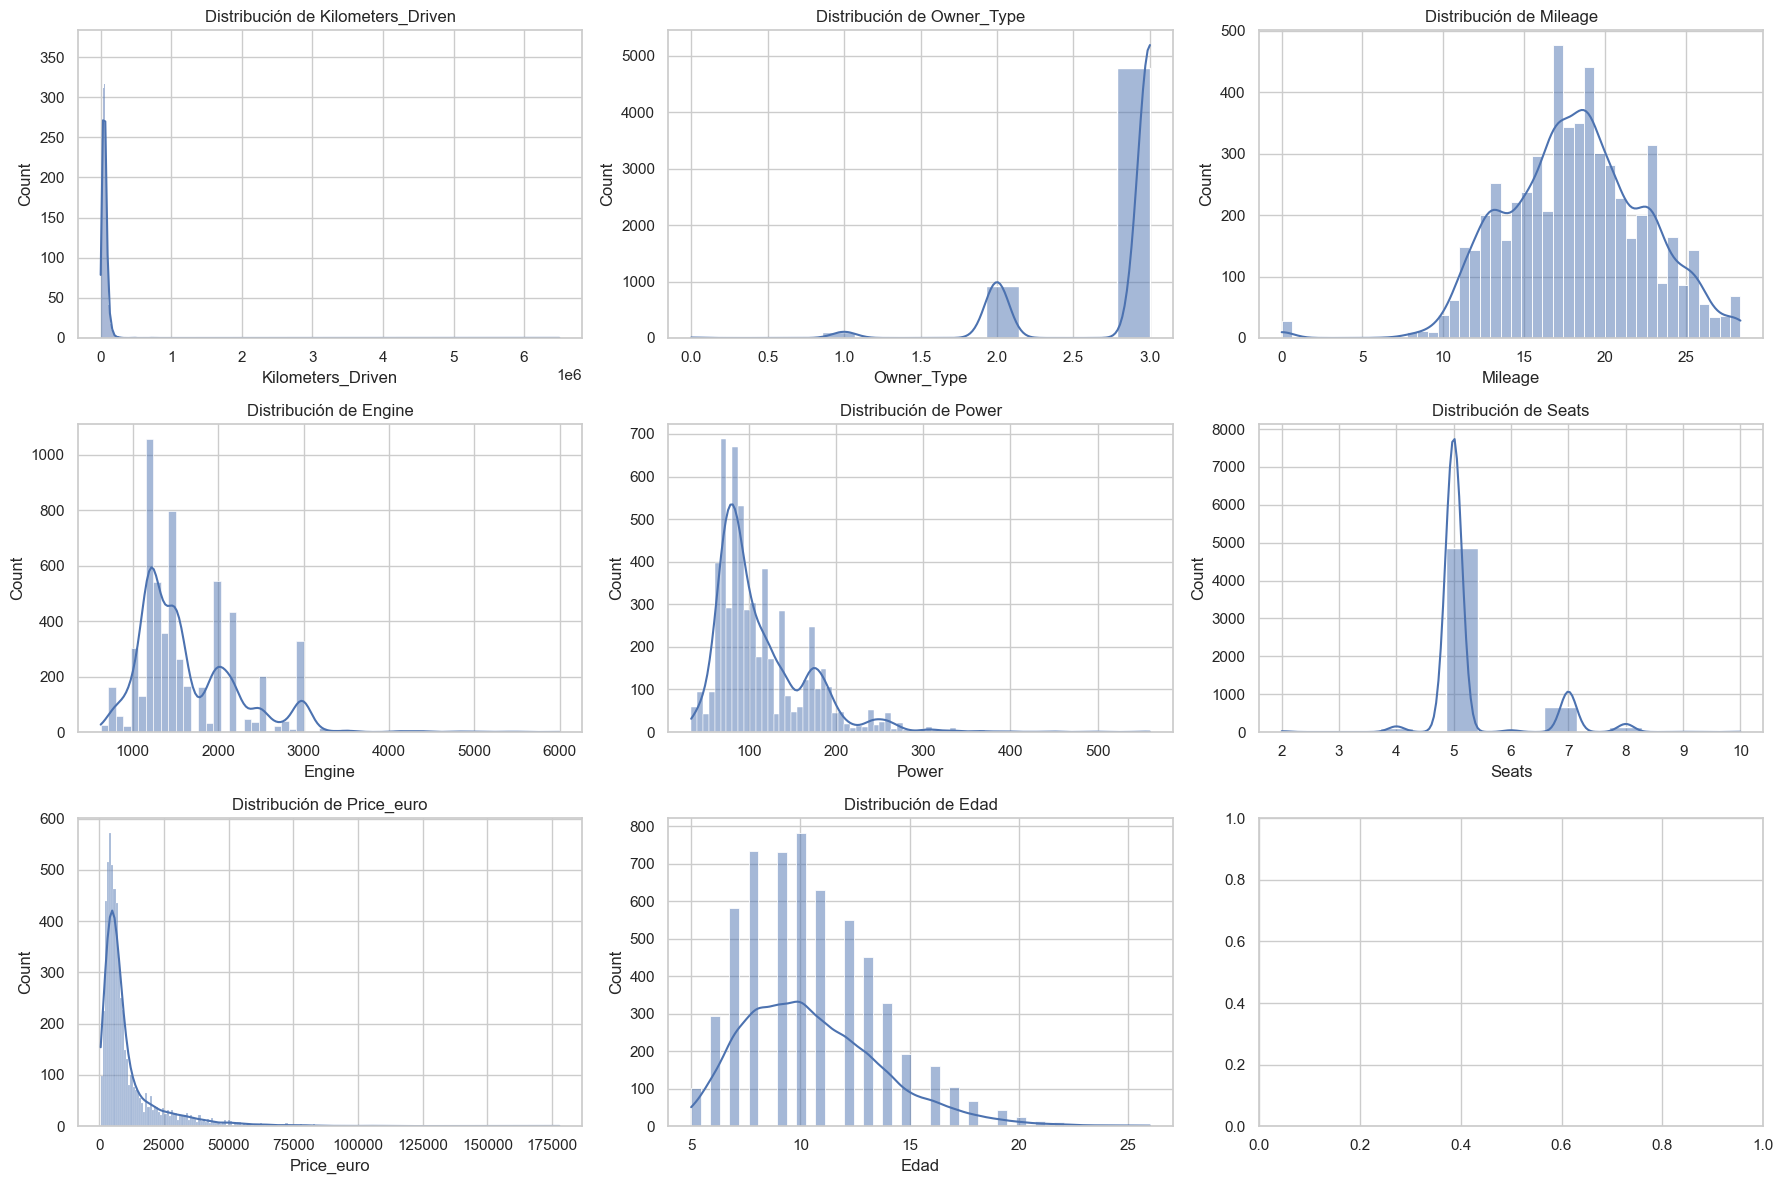

In [64]:
# Configuración de estilo de seaborn
sns.set_theme(style="whitegrid")

# Definir las variables numéricas que queremos visualizar
variables_numericas = ['Kilometers_Driven', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price_euro', 'Edad']

# Crear subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))

# Iterar sobre las variables numéricas y dibujar histogramas y gráficos de densidad
for ax, variable in zip(axes.flatten(), variables_numericas):
    sns.histplot(df[variable], kde=True, ax=ax)
    ax.set_title(f'Distribución de {variable}')
    ax.set_xlabel(variable)

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()


Observemos ahora la distribución de los datos de cada vaiable numérica, para esto, utilizaremos Boxplots que nos permitirán ver la concentración de los datos suministrados y si existen datos extremos.

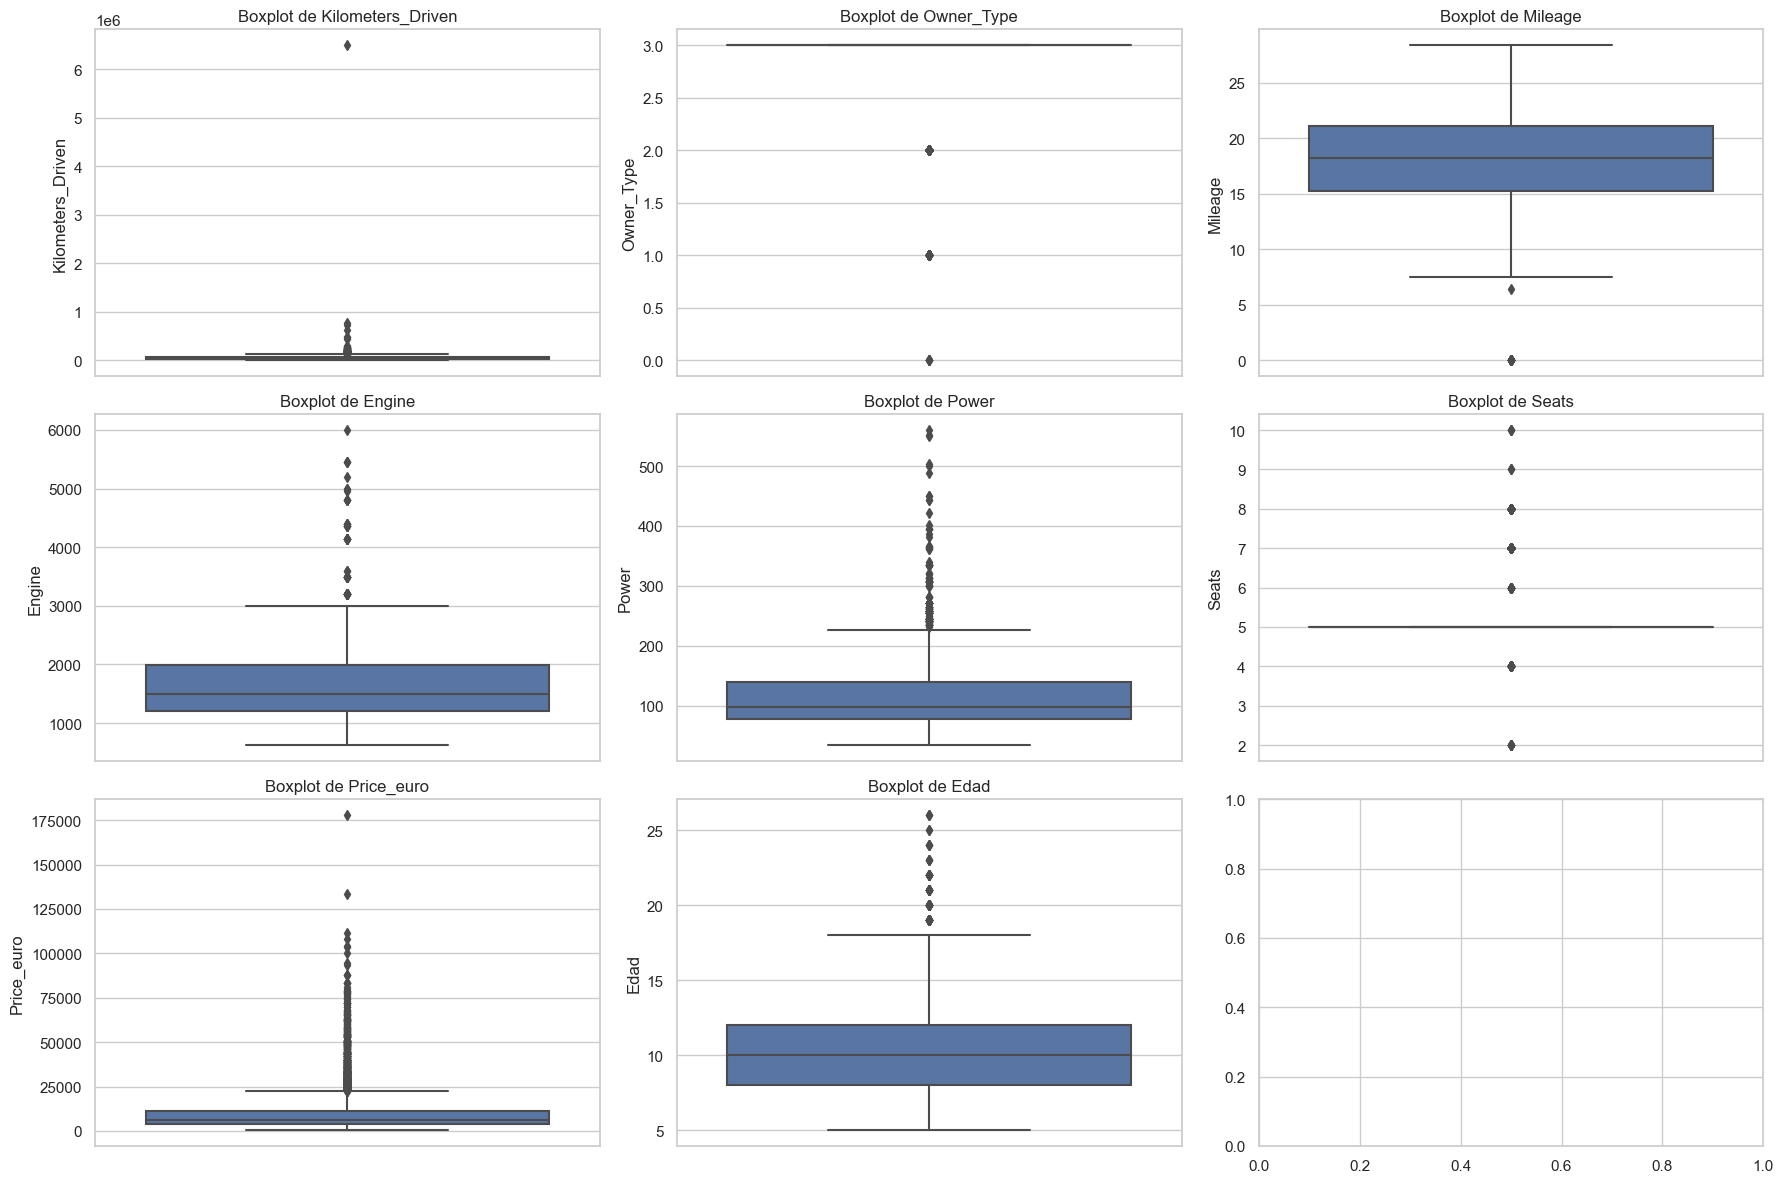

In [65]:
# Configuración de estilo de seaborn
sns.set_theme(style="whitegrid")

# Crear subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))

# Iterar sobre las variables numéricas y dibujar boxplots
for ax, variable in zip(axes.flatten(), variables_numericas):
    sns.boxplot(data=df, y=variable, ax=ax)
    ax.set_title(f'Boxplot de {variable}')
    ax.set_ylabel(variable)

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()


### Variable 'Kilometers_Driven'

In [66]:

df[df['Kilometers_Driven']>6000000]

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price_euro,Edad,Name_General
2245,Chennai,6500000,Diesel,Automatic,3,15.97,2993.0,258.0,5.0,72254.34,7,BMW


Observamos que tiene un valor extremo superior a los 6 millones de kilometros, viendo que su edad es de 7 años (tendria que haber hecho 928mil kilometros al año) y su precio es considerablemte alto, suponemos que se trata de un error de digitación. La solución a este valor es imputarle con el valor del bigote superior del boxplot para esta variable. Los demás valores extremos están por debajo del millón de kilómetros, por lo que presumimos que son valores posibles.

In [67]:
# Calcula los cuartiles
Q1 = df['Kilometers_Driven'].quantile(0.25)
Q3 = df['Kilometers_Driven'].quantile(0.75)

# Calcula el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Calcula el bigote superior
bigote_sup = Q3 + 1.5 * IQR

print("Bigote superior:", bigote_sup)


Bigote superior: 131211.75


In [68]:
# Imputacion del valor extremo en variable 'Kilometers_Driven'

df['Kilometers_Driven'] = df['Kilometers_Driven'].replace(6500000, bigote_sup)

In [69]:
df[df['Kilometers_Driven']>6000000]

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price_euro,Edad,Name_General


### Variable 'Mileage'

En la gráfica boxplot de esta variable, encontramos valores en cero. Como no posible que un coche consuma cero litros de combustible cuando está en movimiento, asumimos que es un valor erroneo, en este caso vamos a imputar a los valores iguales a cero el valor que toma el bigote inferior del boxplot de esta variable.

In [70]:
# Calcula los cuartiles
Q1 = df['Mileage'].quantile(0.25)
Q3 = df['Mileage'].quantile(0.75)

# Calcula el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Calcula el bigote inferior
bigote_inf = Q1 - 1.5 * IQR

print("Bigote inferior:", bigote_inf)

Bigote inferior: 6.499999999999998


In [71]:
# Imputacion del valor extremo en variable 'Mileage'
df['Mileage'] = df['Mileage'].replace(0, bigote_inf)

In [72]:
df[df['Mileage']==0]

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price_euro,Edad,Name_General


---------------------
### Observacion:
 
Las demas variables que contienen valores extremos las hemos dejado como están, esto debido a que consideramos que son valores posibles.

--------------------

## Ahora veremos la distribucion de las variables categoricas

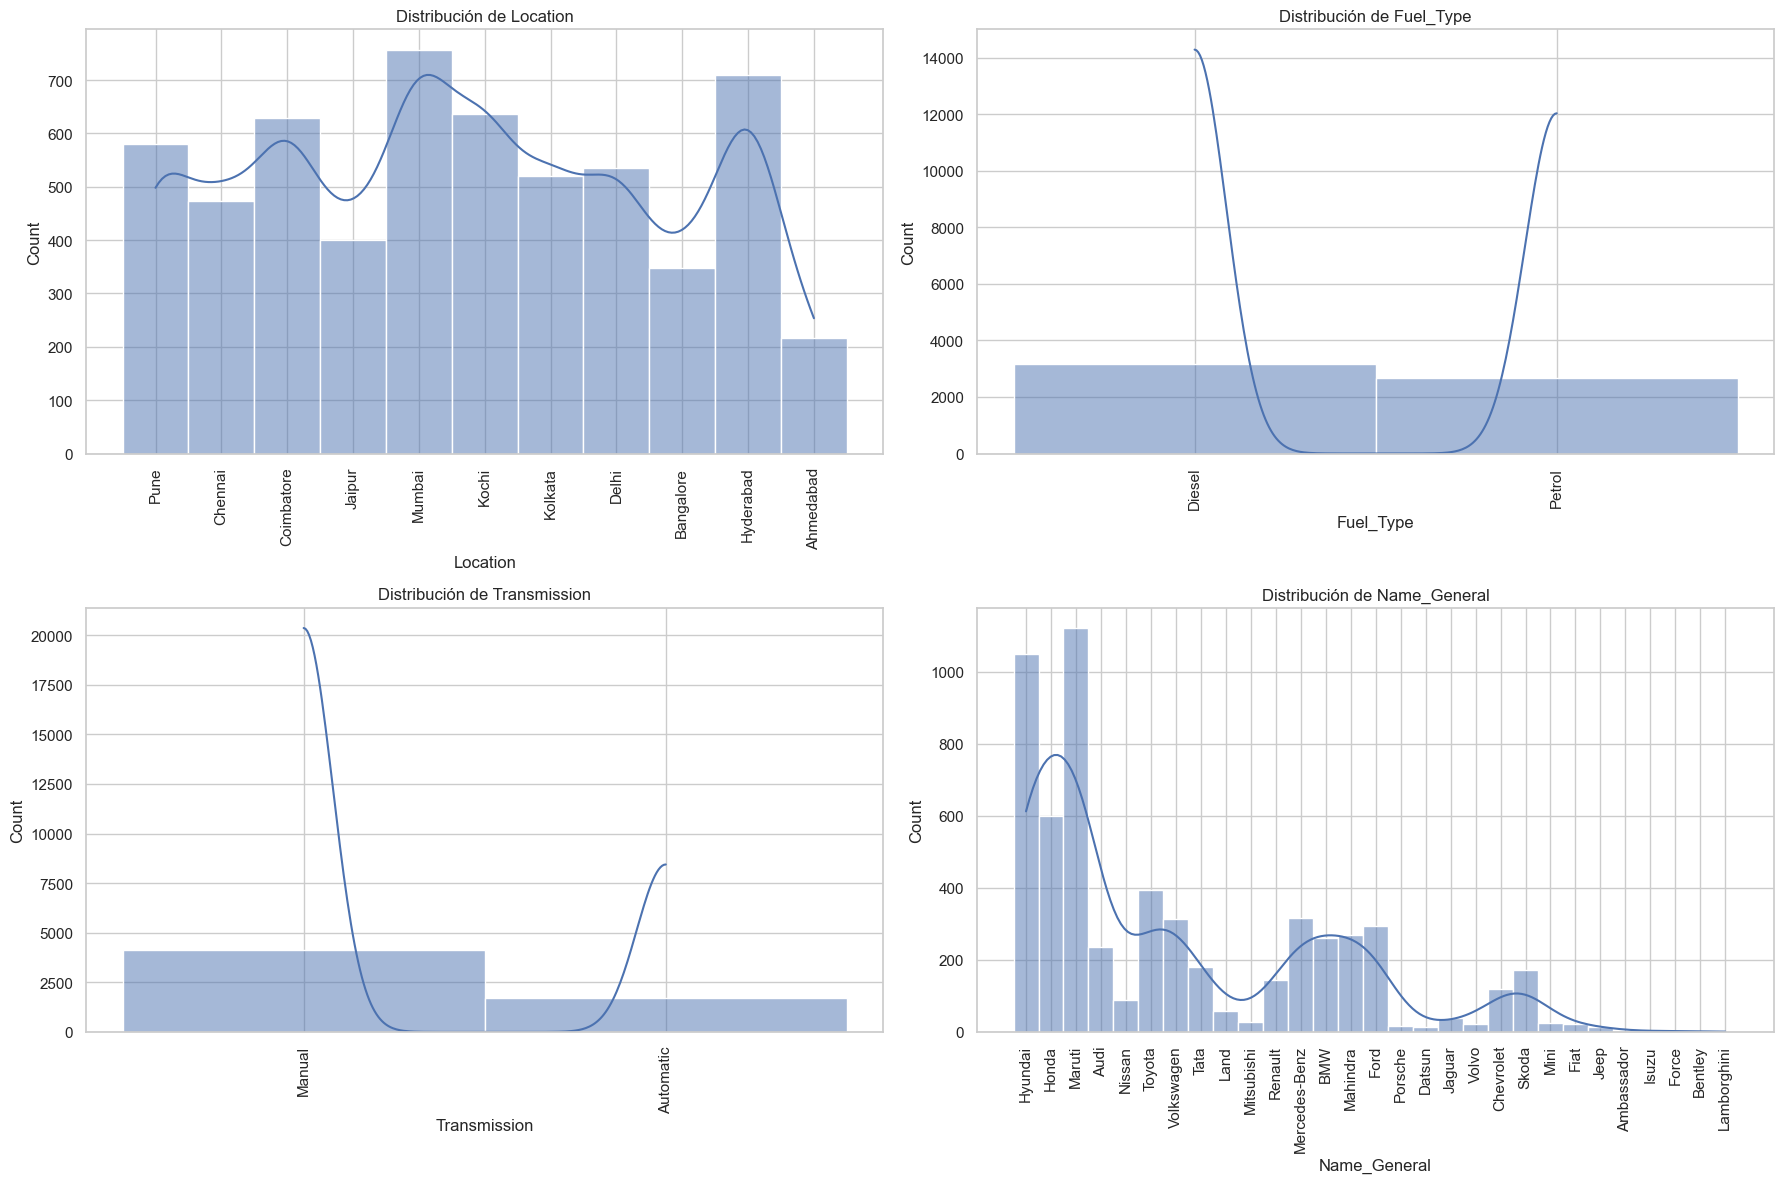

In [73]:
# Configuración de estilo de seaborn
sns.set_theme(style="whitegrid")

# Definir las variables categóricas que queremos visualizar
variables_categoricas = ['Location', 'Fuel_Type', 'Transmission', 'Name_General']

# Crear subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))

# Iterar sobre las variables categóricas y dibujar histogramas y gráficos de densidad
for ax, variable in zip(axes.flatten(), variables_categoricas):
    sns.histplot(df[variable], kde=True, ax=ax)
    
    ax.set_title(f'Distribución de {variable}')
    ax.set_xlabel(variable)
    
    # Rotar las etiquetas del eje X a 90 grados
    for label in ax.get_xticklabels():
        label.set_rotation(90)

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

---------------------
### Observacion:
 
1. Distribución de la variable 'Location':
* Se observa que las ubicaciones con mayor número de registros son Mumbai y Hyderabad, con más de 700 registros cada una.
* Las ciudades como Pune, Chennai, Bangalore y Coimbatore también tienen una cantidad considerable de registros, con valores cercanos a los 500-600.
* En contraste, ciudades como Jaipur, Kochi, Kolkata, Delhi y Ahmedabad tienen menos registros, con valores que varían entre aproximadamente 200 y 500.
2. Distribución de la variable 'Fuel_Type':
* La distribución muestra dos picos bien definidos en Diesel y Petrol, que son los dos tipos de combustible principales.
* Ambas categorías parecen tener una cantidad similar de registros siendo superior la cantidad en Diesel.
3. Distribución de la variable 'Transmission':
* Hay una clara preferencia por las transmisiones manuales. Las transmisiones automáticas tienen significativamente menos registros, 
4. Distribución de 'Name_General':
* Hyundai, Honda y Maruti son las marcas con mayor número de registros, cada una con más de 800 registros.
* Otras marcas como Audi, Nissan, Toyota y Volkswagen también tienen una presencia notable, aunque con menos registros.
* Marcas como Tata, Ford, Mercedes-Benz, BMW, y algunas otras tienen una menor representación, con menos de 500 registros cada una.
* Algunas marcas, como Porsche, Jaguar, y otras de lujo tienen un número de registros muy bajo.
--------------------

## 3. Visualización de relación de variables 

Estos gráficos nos ayudarán a identificar posibles correlaciones entre variables numéricas y a comprender cómo diferentes categorías de variables categóricas afectan a la distribución de 'Price_euro'.

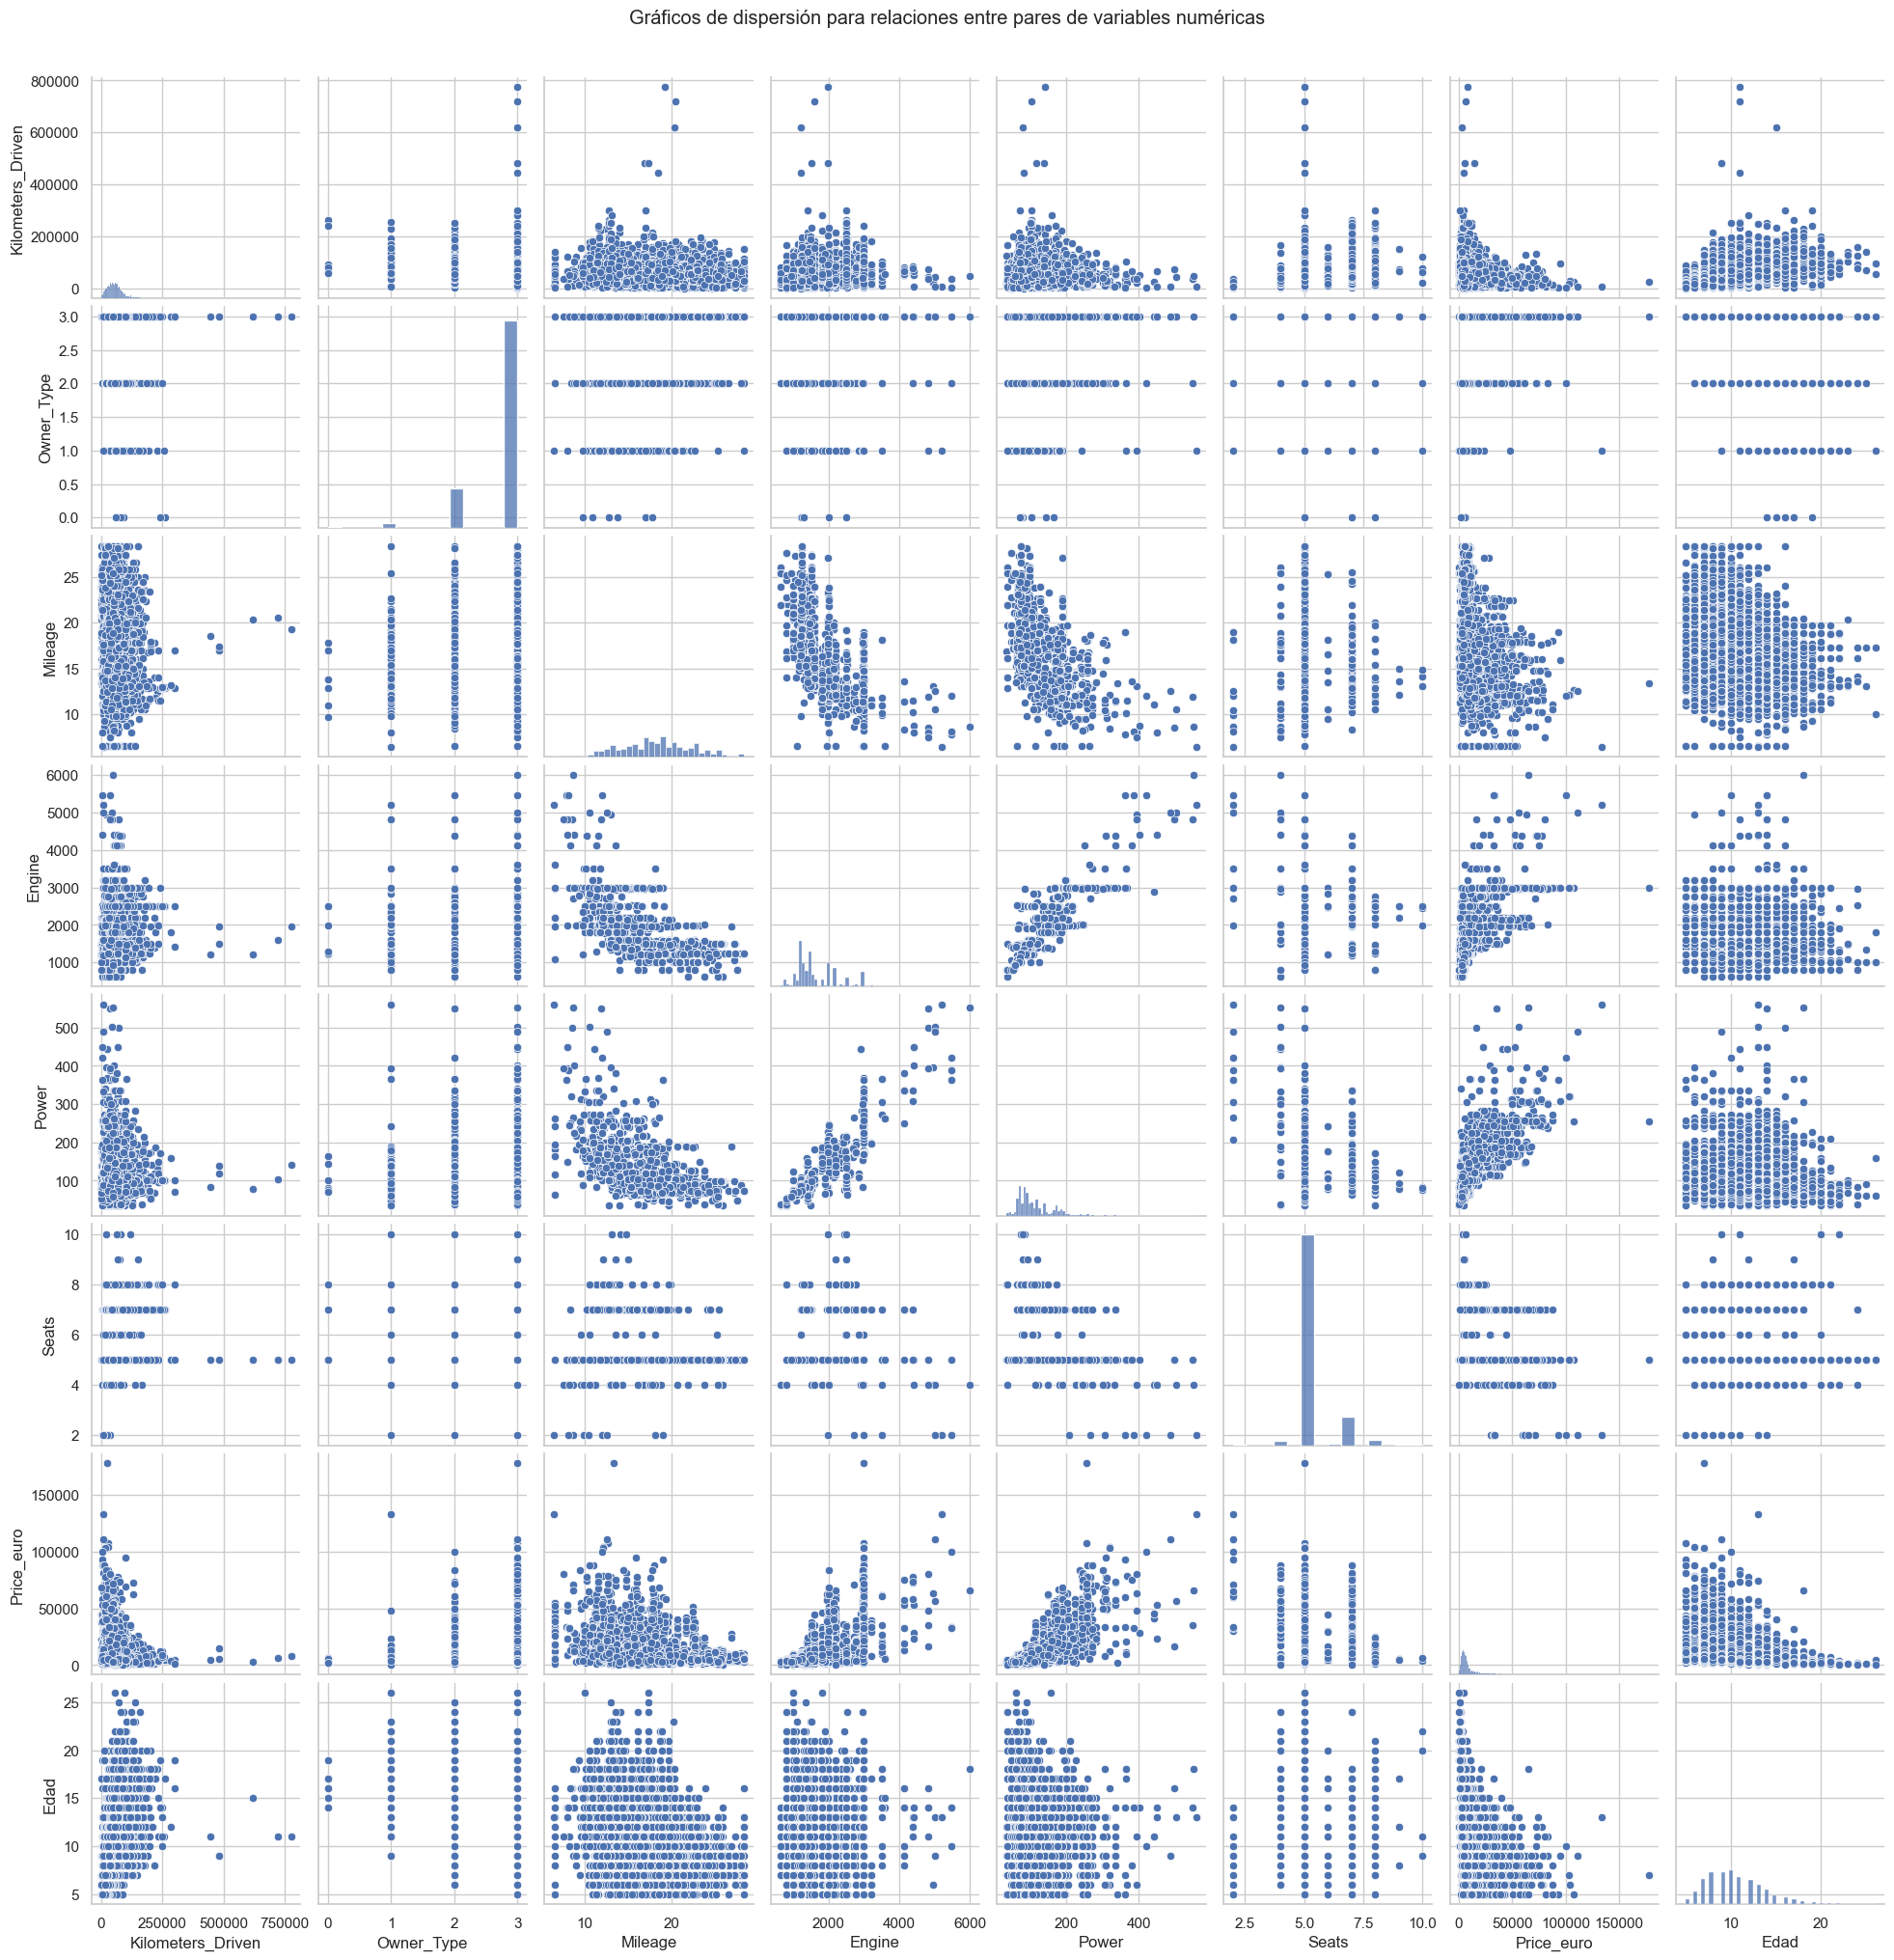

In [74]:
# Configuración de estilo de seaborn
sns.set_theme(style="whitegrid")

# Gráficos de dispersión para relaciones entre pares de variables numéricas
sns.pairplot(df[variables_numericas])
plt.suptitle('Gráficos de dispersión para relaciones entre pares de variables numéricas', y=1.02)
plt.show()

Observaremos la relación que existe entre la variable objetivo 'Price_euro' y las variables categoricas. Para esta visualizacion, utilizaremos Boxplots.



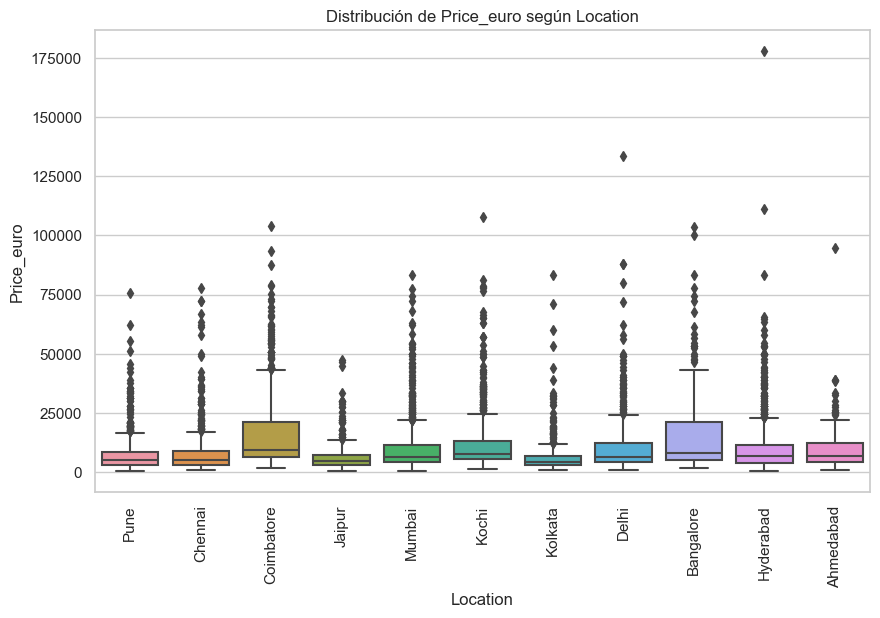

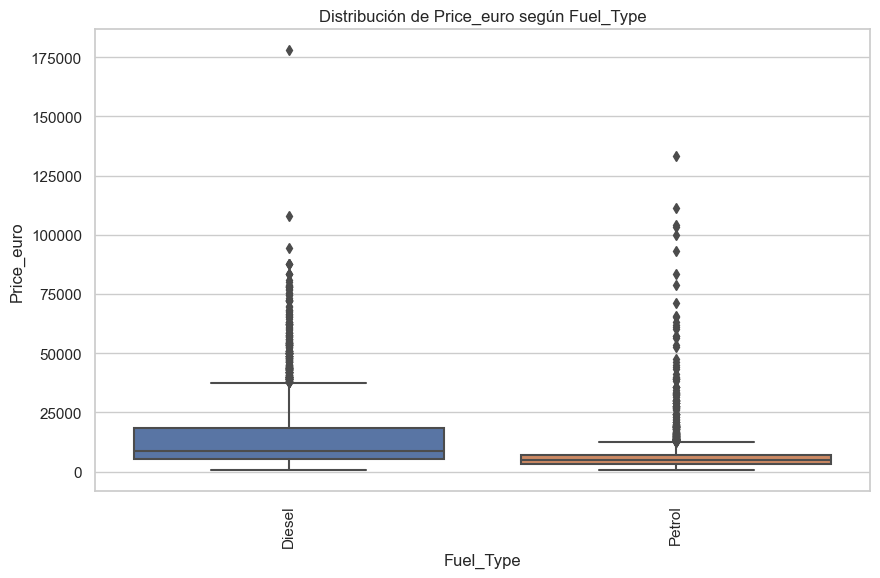

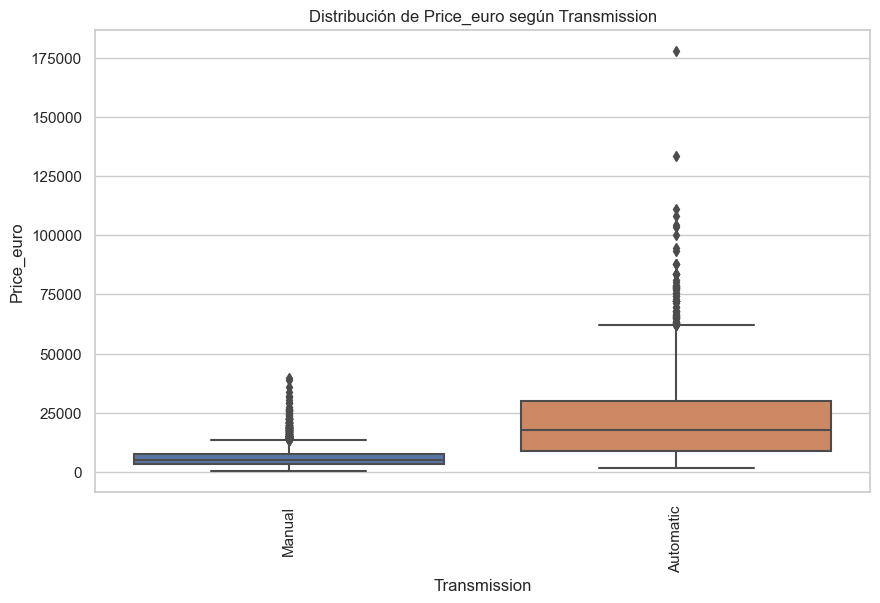

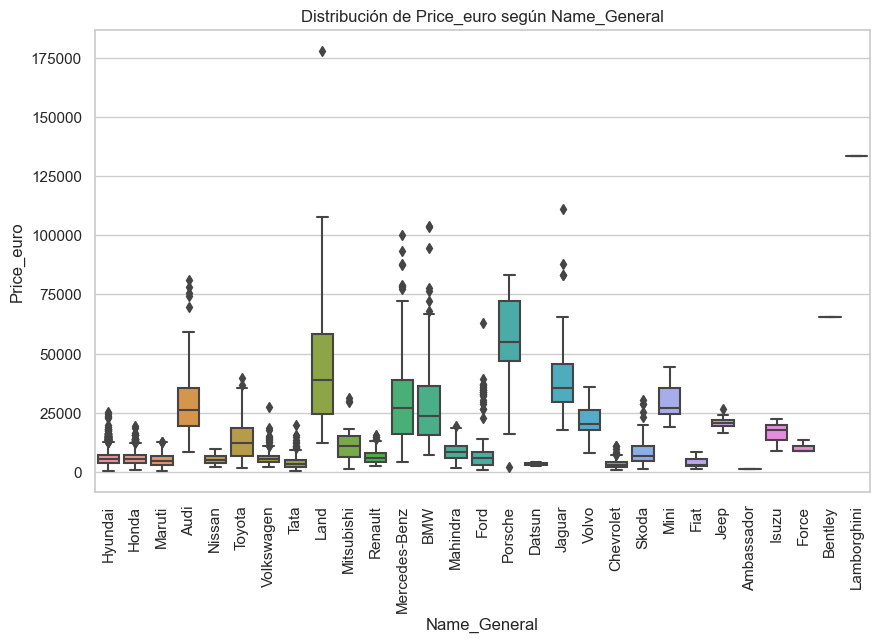

In [75]:
# Gráficos de cajas para comparar la distribución de una variable numérica entre diferentes grupos definidos por una variable categórica
variables_categoricas = ['Location', 'Fuel_Type', 'Transmission', 'Name_General']

for variable_cat in variables_categoricas:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=variable_cat, y='Price_euro', data=df)
    plt.title(f'Distribución de Price_euro según {variable_cat}')
    plt.xlabel(variable_cat)
    plt.ylabel('Price_euro')
    plt.xticks(rotation=90)
    plt.show()

---------------------
### Observacion:
En este ejercicio podemos realizar varias observaciones en referencia a las variables categoricas con la variable objetivo 'Price_Euro', entre estas las mas importantes segun mi criterio y variable analizada son:

1. 'Location'
    
    * La mayoría de las ciudades muestran una gran distribución de precios, con una concentración entre 0 y 50,000€.
    * Hay muchos valores atípicos que estan por encima de los 50,000€, lo que indica que hay vehículos significativamente más caros en todas las ubicaciones. 
    * Coimbatore y Bangalore al parecer tienen la mayor variabilidad en los precios, con rangos intercuartílicos (IQR) más dispersos.
    * Chennai, Pune, Jaipur, Kolkata y Ahmedabad tienen distribuciones de precios más concentradas y rangos más estrechos, indicando menos variabilidad en los precios.
    * Todas las ciudades tienen una cantidad importante de valores atípicos, con precios que van hasta los 175,000€ en el caso extremo.
    * La presencia de estos valores atípicos sugiere que hay una minoría de vehículos de alta gama  y/o lujo en el mercado.
    * Las medianas de precios en todas las ciudades son muy similares, indicando que el precio medio de los vehículos no varía mucho entre las diferentes ubicaciones.
    * La mediana más baja se observa en Kolkata, la mas alta en Coimbatore.

2. 'Fuel_Type'
    
    * Los precios de los vehículos que usan combustible Diesel tienden a ser más altos en comparación con los que usan gasolina (Petrol).
    * La mediana del precio de los vehículos Diesel es más alta que la mediana de los vehículos a gasolina.
    * Los vehículos Diesel muestran una mayor diversidad en los precios, con un rango intercuartílico (IQR) más espaciado que los vehículos a gasolina.
    * La mayor dispersión de precios en los vehículos Diesel muestra una gama más amplia de opciones en este tipo de combustible.
    * Las dos categorías tienen valores atípicos, pero los vehículos Diesel tienen valores que alcanzan precios mucho más altos, llegando hasta los 175,000€.
    * Los coches a gasolina también tienen valores atípicos, aunque menos que los Diesel.
    * Los coches Diesel no solo tienen una mediana de precio más alta, también una mayor presencia de vehículos de muy alta gama, como lo muestran los outliers en el rango superior.
    * Los vehículos a gasolina presentan una distribución más concentrada y precios generalmente más bajos.
    * El mercado de coches Diesel cobija vehículos económicos hasta modelos de lujo, lo que lo hace muy diverso.
    * Los vehículos a gasolina, en promedio, son más accesibles económicamente, presentando menos variabilidad en los precios y menos extremos en el rango superior.

3. 'Transmission'

    * Los coches con transmisión automática tienden a tener precios mas altos en comparación con los coches con transmisión manual.
    * La mediana del precio de los coches automáticos es más alta que la de los vehículos manuales.
    * Los vehículos automáticos muestran una mayor variabilidad en los precios, con un rango intercuartílico (IQR) más grande que los coches manuales.
    * Esta mayor dispersión de precios muestra una gama más amplia de opciones en los vehículos automáticos, incluyendo una mayor presencia de coches de alta gama.
    * Los coches automáticos tienen valores atípicos que alcanzan precios mucho más altos, llegando hasta los 175,000€.
    * Los coches manuales también tienen algunos valores atípicos, aunque con precios significativamente más bajos en comparación con los coches automáticos.
    * Los coches automáticos tienen una mayor presencia de coches de muy alta gama, como se indica por los outliers en el rango superior.
    * Los coches manuales presentan una distribución más concentrada y precios generalmente más bajos.

4. 'Name_General'

    * Las marcas de lujo como Lamborghini, Bentley, y Porsche muestran precios notablemente más altos con medianas mucho más elevadas.
    * Marcas como Mercedes-Benz, BMW, y Jaguar también tienen una alta variabilidad en los precios, con medianas elevadas y varios valores atípicos que muestran la presencia de modelos de alta gama.
    * Tata, Hyundai, Honda, Maruti, y Chevrolet tienen precios más bajos en comparación con las marcas de lujo. La mediana de los precios para estas marcas es menor.
    * Ford y Skoda muestran una amplia dispersión en los precios con varios outliers, indicando la presencia de una gama variada de modelos.
    * Varias marcas tienen valores atípicos (outliers) que alcanzan precios muy altos. Esto es especialmente notable en Porsche, Mercedes-Benz, BMW, y Jaguar.
    * Lamborghini tiene un valor atípico muy alto, lo que refleja el precio extremadamente elevado de sus modelos.
--------------------

Observaremos la relación que existe entre la variable objetivo 'Price_euro' y las variables numéricas. Para esta visualización, utilizaremos Boxplots.


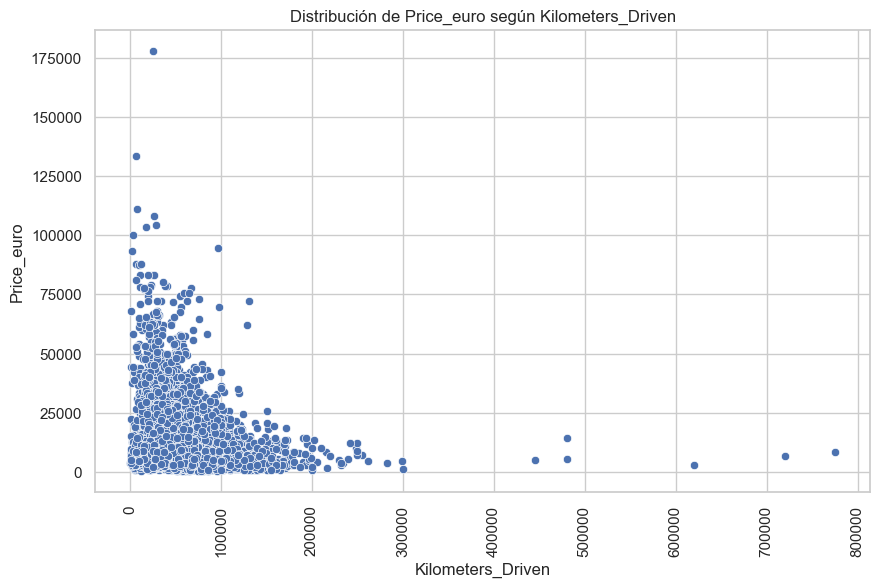

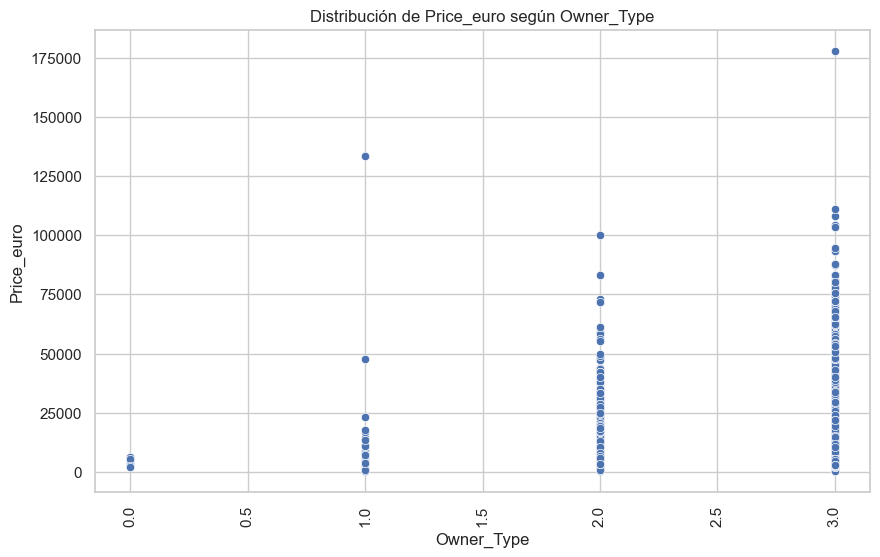

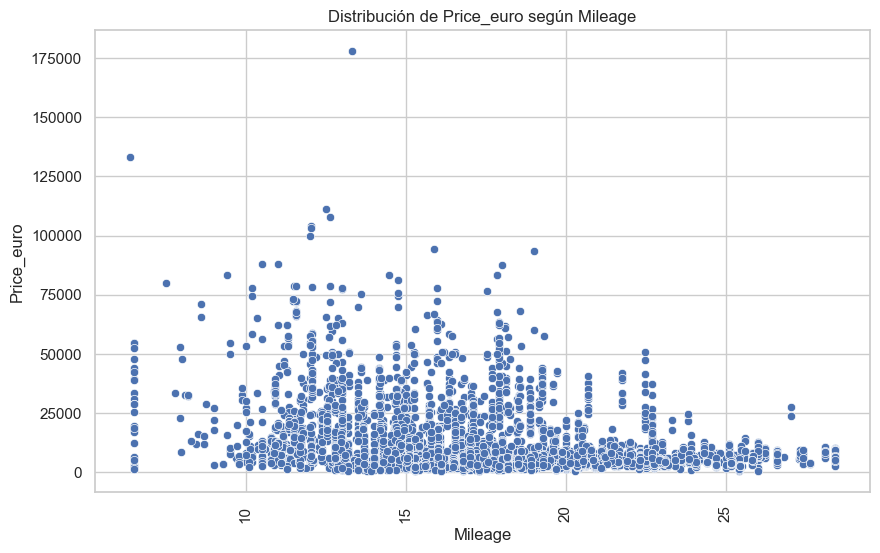

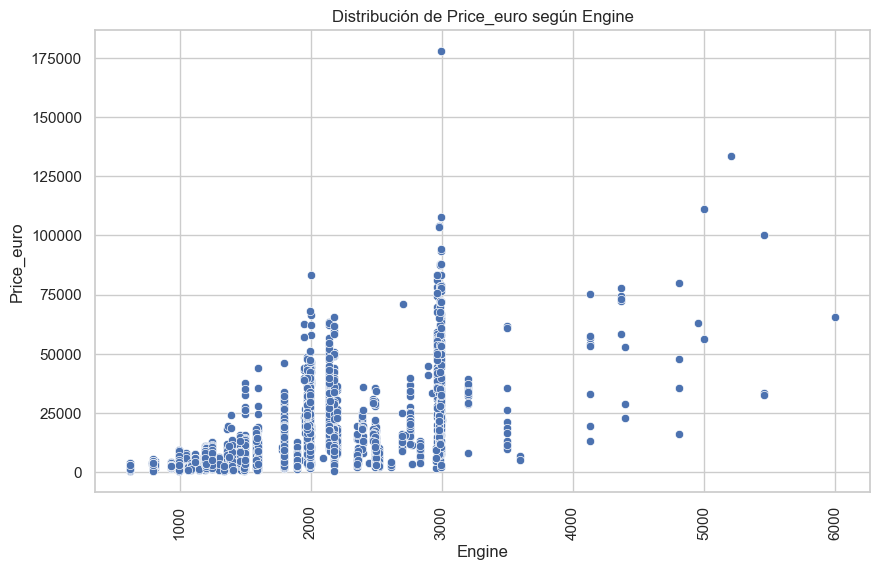

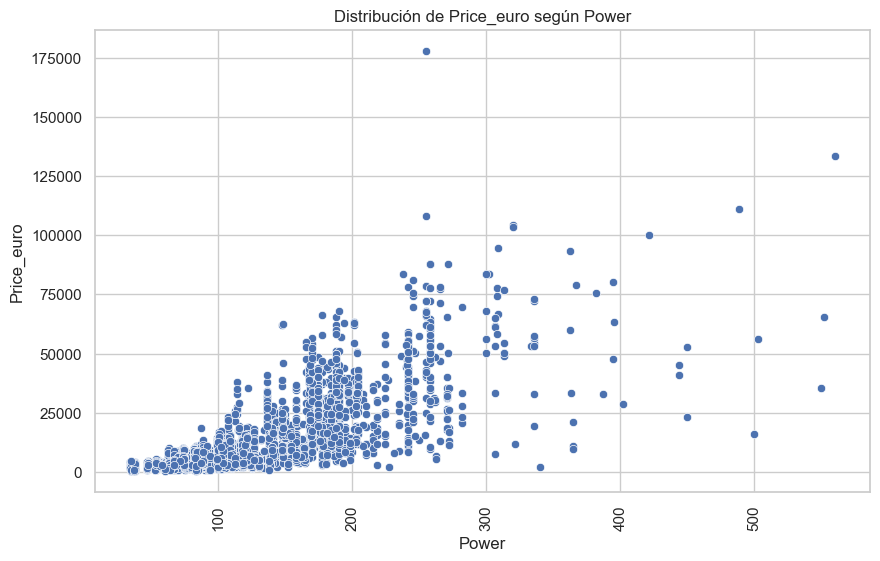

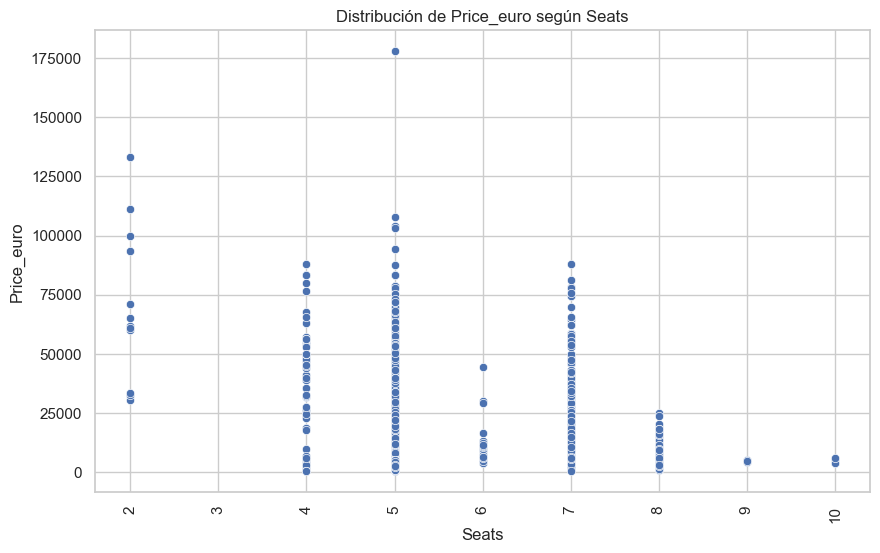

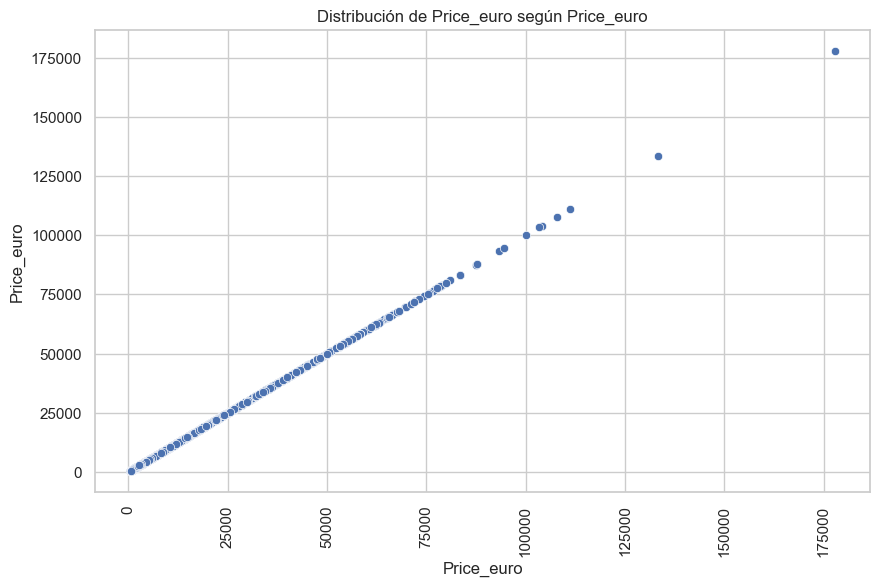

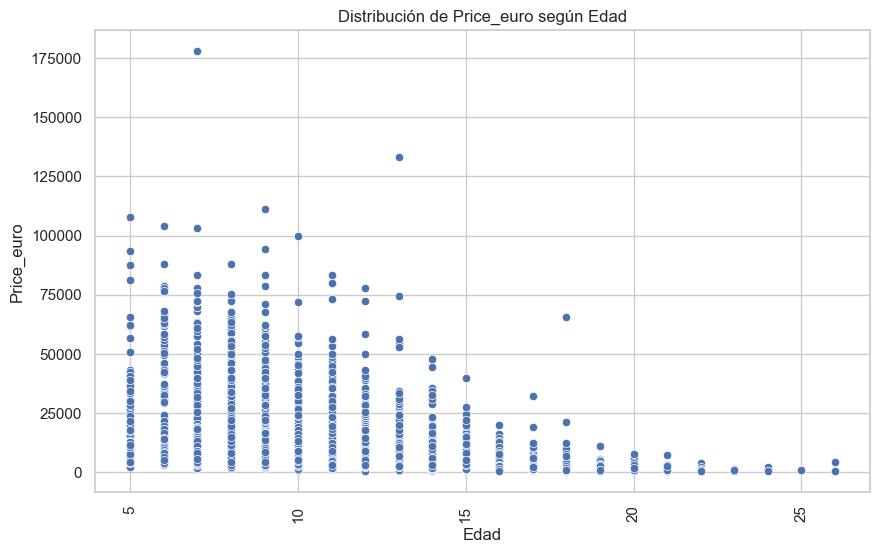

In [76]:
# Gráficos de dispoersion para comparar la distribución de variables numéricas vs la variable objetivo

for variable_num in variables_numericas:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=variable_num, y='Price_euro', data=df)
    plt.title(f'Distribución de Price_euro según {variable_num}')
    plt.xlabel(variable_num)
    plt.ylabel('Price_euro')
    plt.xticks(rotation=90)
    plt.show()

---------------------
### Observacion:
En este ejercicio podemos realizar varias observaciones en referencia a las variables numéricas con la variable objetivo 'Price_Euro', entre estas las mas importantes segun mi criterio y variable analizada son:

1. 'Kilometer_Driven'
    
    * Aparentemenre hay una relación inversamente proporcional entre estas dos variables, lo que indica que a mayor kilometraje del vehiculo, menor es su precio.
    * La mayor cantidad de datos esta ubicada en la parte inferior izquierda de la grafica, lo que nos muestra que la mayoria de los vehiculos del ejercicio posee menos de 200mil kilometros y cuesta menos de 50mil euros. 
    * Los valores outliers nos pueden señalar vehiculos que pese a su gran recorrido aun tienen precios por encima de la media, lo que indicaria vehiculos de marcas costosas, con prestaciones especiales, ediciones limitadas o antiguos. 
    * 

2. 'Owner_Type' (3: Primer dueño (First), 2: Segundo dueño (Second), 1: Tercer dueño (Third), 0: Cuarto dueño o más (Fourth & Above))
    
    * La grafica eviencia una tendencia de disminucion del precio a medida que aumenta el numero de propietarios que ha tenido el vehiculo. 
    * La categoria 3 (primer dueño) muestra unos outliers demasiado altos, lo que indica que se trata de vehiculos de lujo o con prestaciones especiales.
    * La categoria 1 (tercer dueño) se concentra en su mayoria de datos por debajo de los 25mil euros, pero tiene algunos valores outliers que nos indican que se puede tratar de vehiculos de alta gama, muy bien cuidados o quizas con prestaciones especiales.


3. 'Mileage'

    * Los coches con transmisión automática tienden a tener precios mas altos en comparación con los coches con transmisión manual.
    * La mediana del precio de los coches automáticos es más alta que la de los vehículos manuales.
    * Los vehículos automáticos muestran una mayor variabilidad en los precios, con un rango intercuartílico (IQR) más grande que los coches manuales.
    * Esta mayor dispersión de precios muestra una gama más amplia de opciones en los vehículos automáticos, incluyendo una mayor presencia de coches de alta gama.
    * Los coches automáticos tienen valores atípicos que alcanzan precios mucho más altos, llegando hasta los 175,000€.
    * Los coches manuales también tienen algunos valores atípicos, aunque con precios  más bajos en comparación con los coches automáticos.
    * Los coches automáticos tienen una mayor presencia de coches de muy alta gama, como se indica por los outliers en el rango superior.
    * Los coches manuales presentan una distribución más concentrada y precios generalmente más bajos.

4. 'Engine'

    * Se muestra una relacion creciente entre el tamaño del motor y su precio. Generalmente, a motores mas grandes, precios mas elevados.
    * Para motores hasta de 2000 cc, los precios tienden a ser mas bajos.
    * Los motores que van desde 2000 cc hasta 3000 cc, tienen una alta variabilidad en sus precios, los cuales van desde 10mil hasta mas de 100mil euros, lo que supone que incluye vehiculos de gama media asi como tambien vehiculos de alta gama o de lujo.
    * A partir de motores de 3000 cc, los precios se elevan notablemtene, van desde los 50mil hasya mas de 100mil euros, lo que supone una linea de vehiculos de alta gama o de lujo.
    * A partir de los 4000 cc los coches son muy escasos, lo que indica que se trata de vehiculos deportivos de alta gama.
    * Existen otras caracteristicas que influyen en el precio de estos vehículos de segunda mano, como por ejemplo el estado general, la marca, la edad del coche y algunas características adicionales y propias de cada vehículo.
    * Se evidencian algunas alineaciones en los valores de 2000 cc y 3000 cc, esto debe indicar que estos tamaños de motor son mas populares en el mercado de vehiculos de segunda mano.

5. 'Power'

    * Su comoportamiento respecto a la variable objetivo es muy similar al de la variable 'Engine', es decir, es directamente proporcional y tiene segmentos de datos que se comportan muy parecido a la variable mensionada.

6. 'Seats'

    * Los precios estan bastante distribuidos para todos los numeros de asientos, por lo que no existe una relacion clara entre estas dos variables.
    * Para los vehiculos de 2 asientos hay una gran gama de precios, destacamos que tiene algunos precios por encima de los 100 mil euros, lo que nos indica que se trata de vehiculos deportivos o de lujo.
    * Los coches de 4 y 5 plazas son los mas abundantes del ejercicio, muestran tambien una amplia variabilidad de precios. 
    * Los vehiculos de mas de 8 plazas suelen ser utilitarios, furgonetas o para transporte de personal, por lo que sus precios suelen ser mas bajos.

7. 'Edad'

    * Evidenciamos un relacion inversa entre la edad y el precio del vehiculo, esto es de esperarse, debido a que los vehiculos se deprecian con el tiempo.
    * Los vehiculos entre 0 y 5 años de edad, tienen una alta variabilidad de precios, presentando algunos datos por encima de los 100mil euros, lo que indica que son vehiculos que conservan sus caracteristicas iniciales o que se trataria de coches de lujo.
    * Entre los 5 y 10 años, se observan precios decrecientes, suponemos que este rango de tiempo es donde ocurre la mayor depreciacion de los vehiculos.
    * Los vehiculos mas antiguos, es decir, desde los 10 años en adelante, se observa una estabilizacion de los precios por debajo de los 25mil euros.

--------------------

## 4. Analisis de correlación (Pearson)

Este análisis de correlación nos ayudará a identificar pares de variables que estén altamente correlacionadas, lo que podría indicar una posible redundancia en los datos o una relación causal entre esas variables.

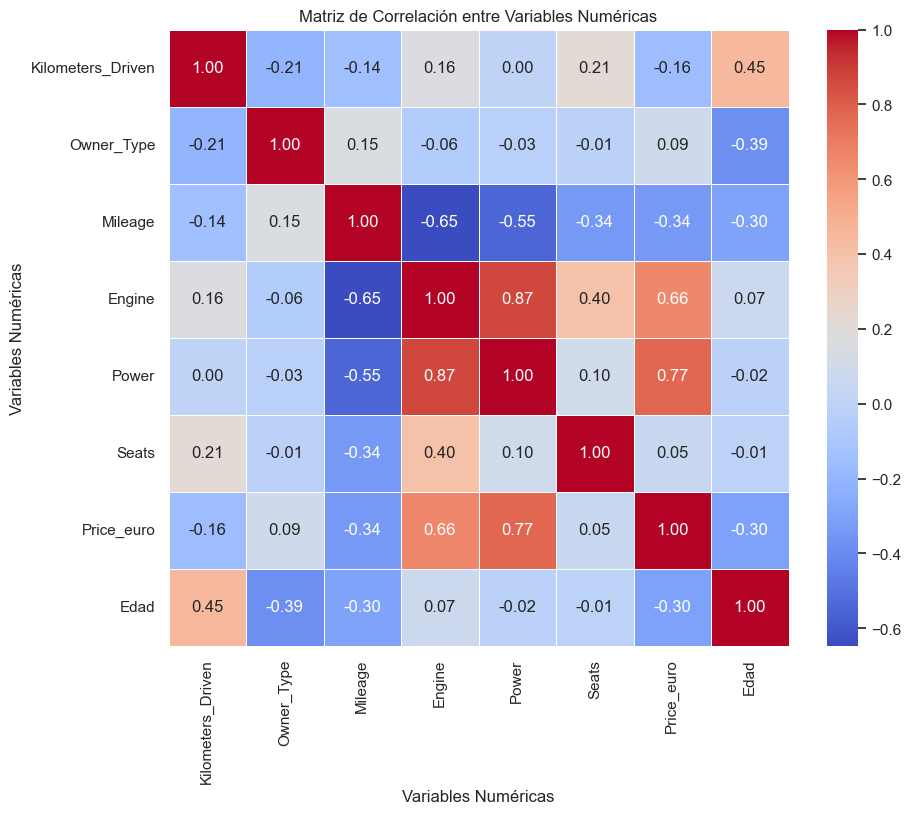

In [77]:
df_numericas = df[variables_numericas]

# Calcular la matriz de correlación
correlation_matrix = df_numericas.corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Visualizar la matriz de correlación utilizando un mapa de calor (heatmap)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Configurar el título y las etiquetas de los ejes
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.xlabel('Variables Numéricas')
plt.ylabel('Variables Numéricas')

# Mostrar el mapa de calor
plt.show()

In [78]:
correlation_matrix

,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price_euro,Edad
Kilometers_Driven,1.000000,-0.208690,-0.139874,0.162356,0.004065,0.213817,-0.162091,0.445118
Owner_Type,-0.208690,1.000000,0.153144,-0.058843,-0.025741,-0.012658,0.091487,-0.387014
Mileage,-0.139874,0.153144,1.000000,-0.645950,-0.546273,-0.341350,-0.341107,-0.297617
Engine,0.162356,-0.058843,-0.645950,1.000000,0.865013,0.400124,0.656887,0.068260
Power,0.004065,-0.025741,-0.546273,0.865013,1.000000,0.098152,0.772422,-0.015246
Seats,0.213817,-0.012658,-0.341350,0.400124,0.098152,1.000000,0.053251,-0.007828
Price_euro,-0.162091,0.091487,-0.341107,0.656887,0.772422,0.053251,1.000000,-0.300675
Edad,0.445118,-0.387014,-0.297617,0.068260,-0.015246,-0.007828,-0.300675,1.000000


In [79]:
# Análisis de correlación entre variables numéricas y el precio del vehículo
correlation_with_price = df[variables_numericas].corr()['Price_euro'].sort_values(ascending=False)
print("Correlación con 'Price_euro':")
print(correlation_with_price)

Correlación con 'Price_euro':
Price_euro           1.000000
Power                0.772422
Engine               0.656887
Owner_Type           0.091487
Seats                0.053251
Kilometers_Driven   -0.162091
Edad                -0.300675
Mileage             -0.341107
Name: Price_euro, dtype: float64


---------------------
### Observacion:
 
1. Alta Correlación entre las variables 'Power' y 'Engine': 0.87
    * Se evidencia una fuerte relación lineal entre estas dos variables. Esto significa que, en general, a medida que aumenta el tamaño del motor, también aumenta la potencia del vehículo. Es de suponer que exista multicolinealidad, por lo que sería prudente considerar combinarlas o transformarlas en el modelo para reducir la multicolinealidad.

2. Relación entre 'Price_euro' y Variables:
    * 'Price_euro' y 'Power': 0.77
    * 'Price_euro' y 'Engine': 0.66
    * La variable  'Price_euro' está altamente correlacionado con 'Power' y 'Engine'. Indica que los coches con motores más grandes y más potentes tienden a ser más costosos. Estas relaciones sugieren que la potencia y el tamaño del motor son determinantes importantes del precio del vehículo. En la predicción de precios, estas variables jugarán un papel de mucho peso.
--------------------

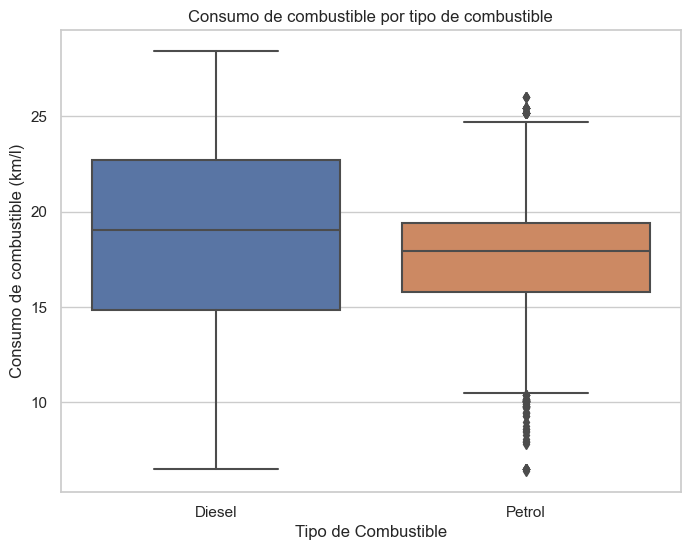

In [80]:
# Gráfico de cajas para comparar el consumo de combustible entre diferentes tipos de combustible
plt.figure(figsize=(8, 6))
sns.boxplot(x='Fuel_Type', y='Mileage', data=df)
plt.title('Consumo de combustible por tipo de combustible')
plt.xlabel('Tipo de Combustible')
plt.ylabel('Consumo de combustible (km/l)')
plt.show()

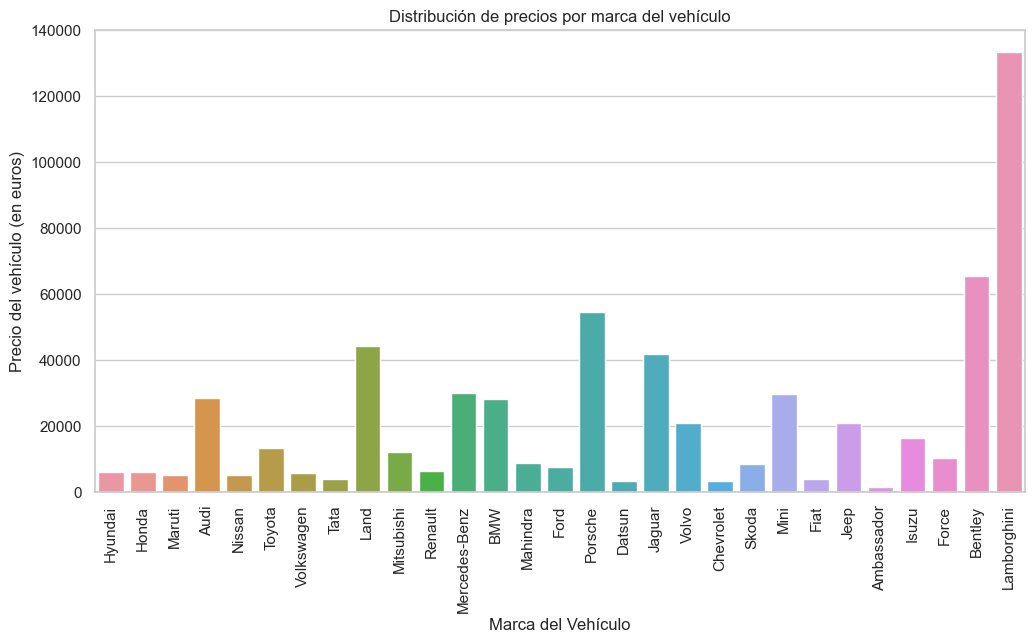

In [81]:
# Gráfico de barras para explorar la distribución de precios por marca del vehículo
plt.figure(figsize=(12, 6))
sns.barplot(x='Name_General', y='Price_euro', data=df, ci=None)
plt.title('Distribución de precios por marca del vehículo')
plt.xlabel('Marca del Vehículo')
plt.ylabel('Precio del vehículo (en euros)')
plt.xticks(rotation=90)
plt.show()

In [82]:
df.describe(include='all')

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price_euro,Edad,Name_General
count,5807,5807.000000,5807,5807,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807
unique,11,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29
top,Mumbai,NaN,Diesel,Manual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maruti
freq,757,NaN,3152,4105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1121
mean,NaN,57252.279964,NaN,NaN,2.804374,18.234235,1631.839332,113.827636,5.286551,10753.033115,10.524195,NaN
std,NaN,37919.266660,NaN,NaN,0.446552,4.180993,601.822651,53.903495,0.806790,12552.259096,3.170718,NaN
min,NaN,171.000000,NaN,NaN,0.000000,6.400000,624.000000,34.200000,2.000000,489.110000,5.000000,NaN
25%,NaN,33288.000000,NaN,NaN,3.000000,15.260000,1198.000000,78.000000,5.000000,3990.660000,8.000000,NaN
50%,NaN,52400.000000,NaN,NaN,3.000000,18.200000,1497.000000,98.600000,5.000000,6391.730000,10.000000,NaN
75%,NaN,72457.500000,NaN,NaN,3.000000,21.100000,1991.000000,139.040000,5.000000,11393.950000,12.000000,NaN


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5807 entries, 0 to 5806
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5807 non-null   object 
 1   Kilometers_Driven  5807 non-null   float64
 2   Fuel_Type          5807 non-null   object 
 3   Transmission       5807 non-null   object 
 4   Owner_Type         5807 non-null   int64  
 5   Mileage            5807 non-null   float64
 6   Engine             5807 non-null   float64
 7   Power              5807 non-null   float64
 8   Seats              5807 non-null   float64
 9   Price_euro         5807 non-null   float64
 10  Edad               5807 non-null   int64  
 11  Name_General       5807 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 544.5+ KB


## 5. Conversion Categoricas a Numericas (OneHot)